<a href="https://colab.research.google.com/github/MaximilianoMoll/AICourse/blob/main/2_Prepare_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# African Heart Disease Dataset
A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of Coronary Heart Disease (CHD). Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event.
In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in  Rousseauw et al, 1983, South African Medical Journal (https://journals.co.za/doi/abs/10.10520/AJA20785135_9894).

- sbp: systolic blood pressure
- tobacco: cumulative tobacco (kg)
- ldl: low densiity lipoprotein cholesterol
- adiposity: Adiposity Index
- famhist: family history of heart disease (Present, Absent)
- typea: type-A behavioral profile
- obesity: Body Mass Index
- alcohol: current alcohol consumption [l/yr]
- age: age at onset
- chd: outcome, coronary heart disease

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
DS = pd.read_csv('saheart_1 withheader.csv')
print(DS.columns.tolist())
DS.loc[DS['CLASS']==-1,'CLASS']=0
DS

['CLASS', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']


,CLASS,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,0,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,1,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,1,134,13.60,3.50,27.78,1,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...,...,...
457,0,214,0.40,5.98,31.72,0,64,28.45,0.00,58
458,1,182,4.20,4.41,32.10,0,52,28.61,18.72,52
459,0,108,3.00,1.59,15.23,0,40,20.09,26.64,55
460,0,118,5.40,11.61,30.79,0,64,27.35,23.97,40


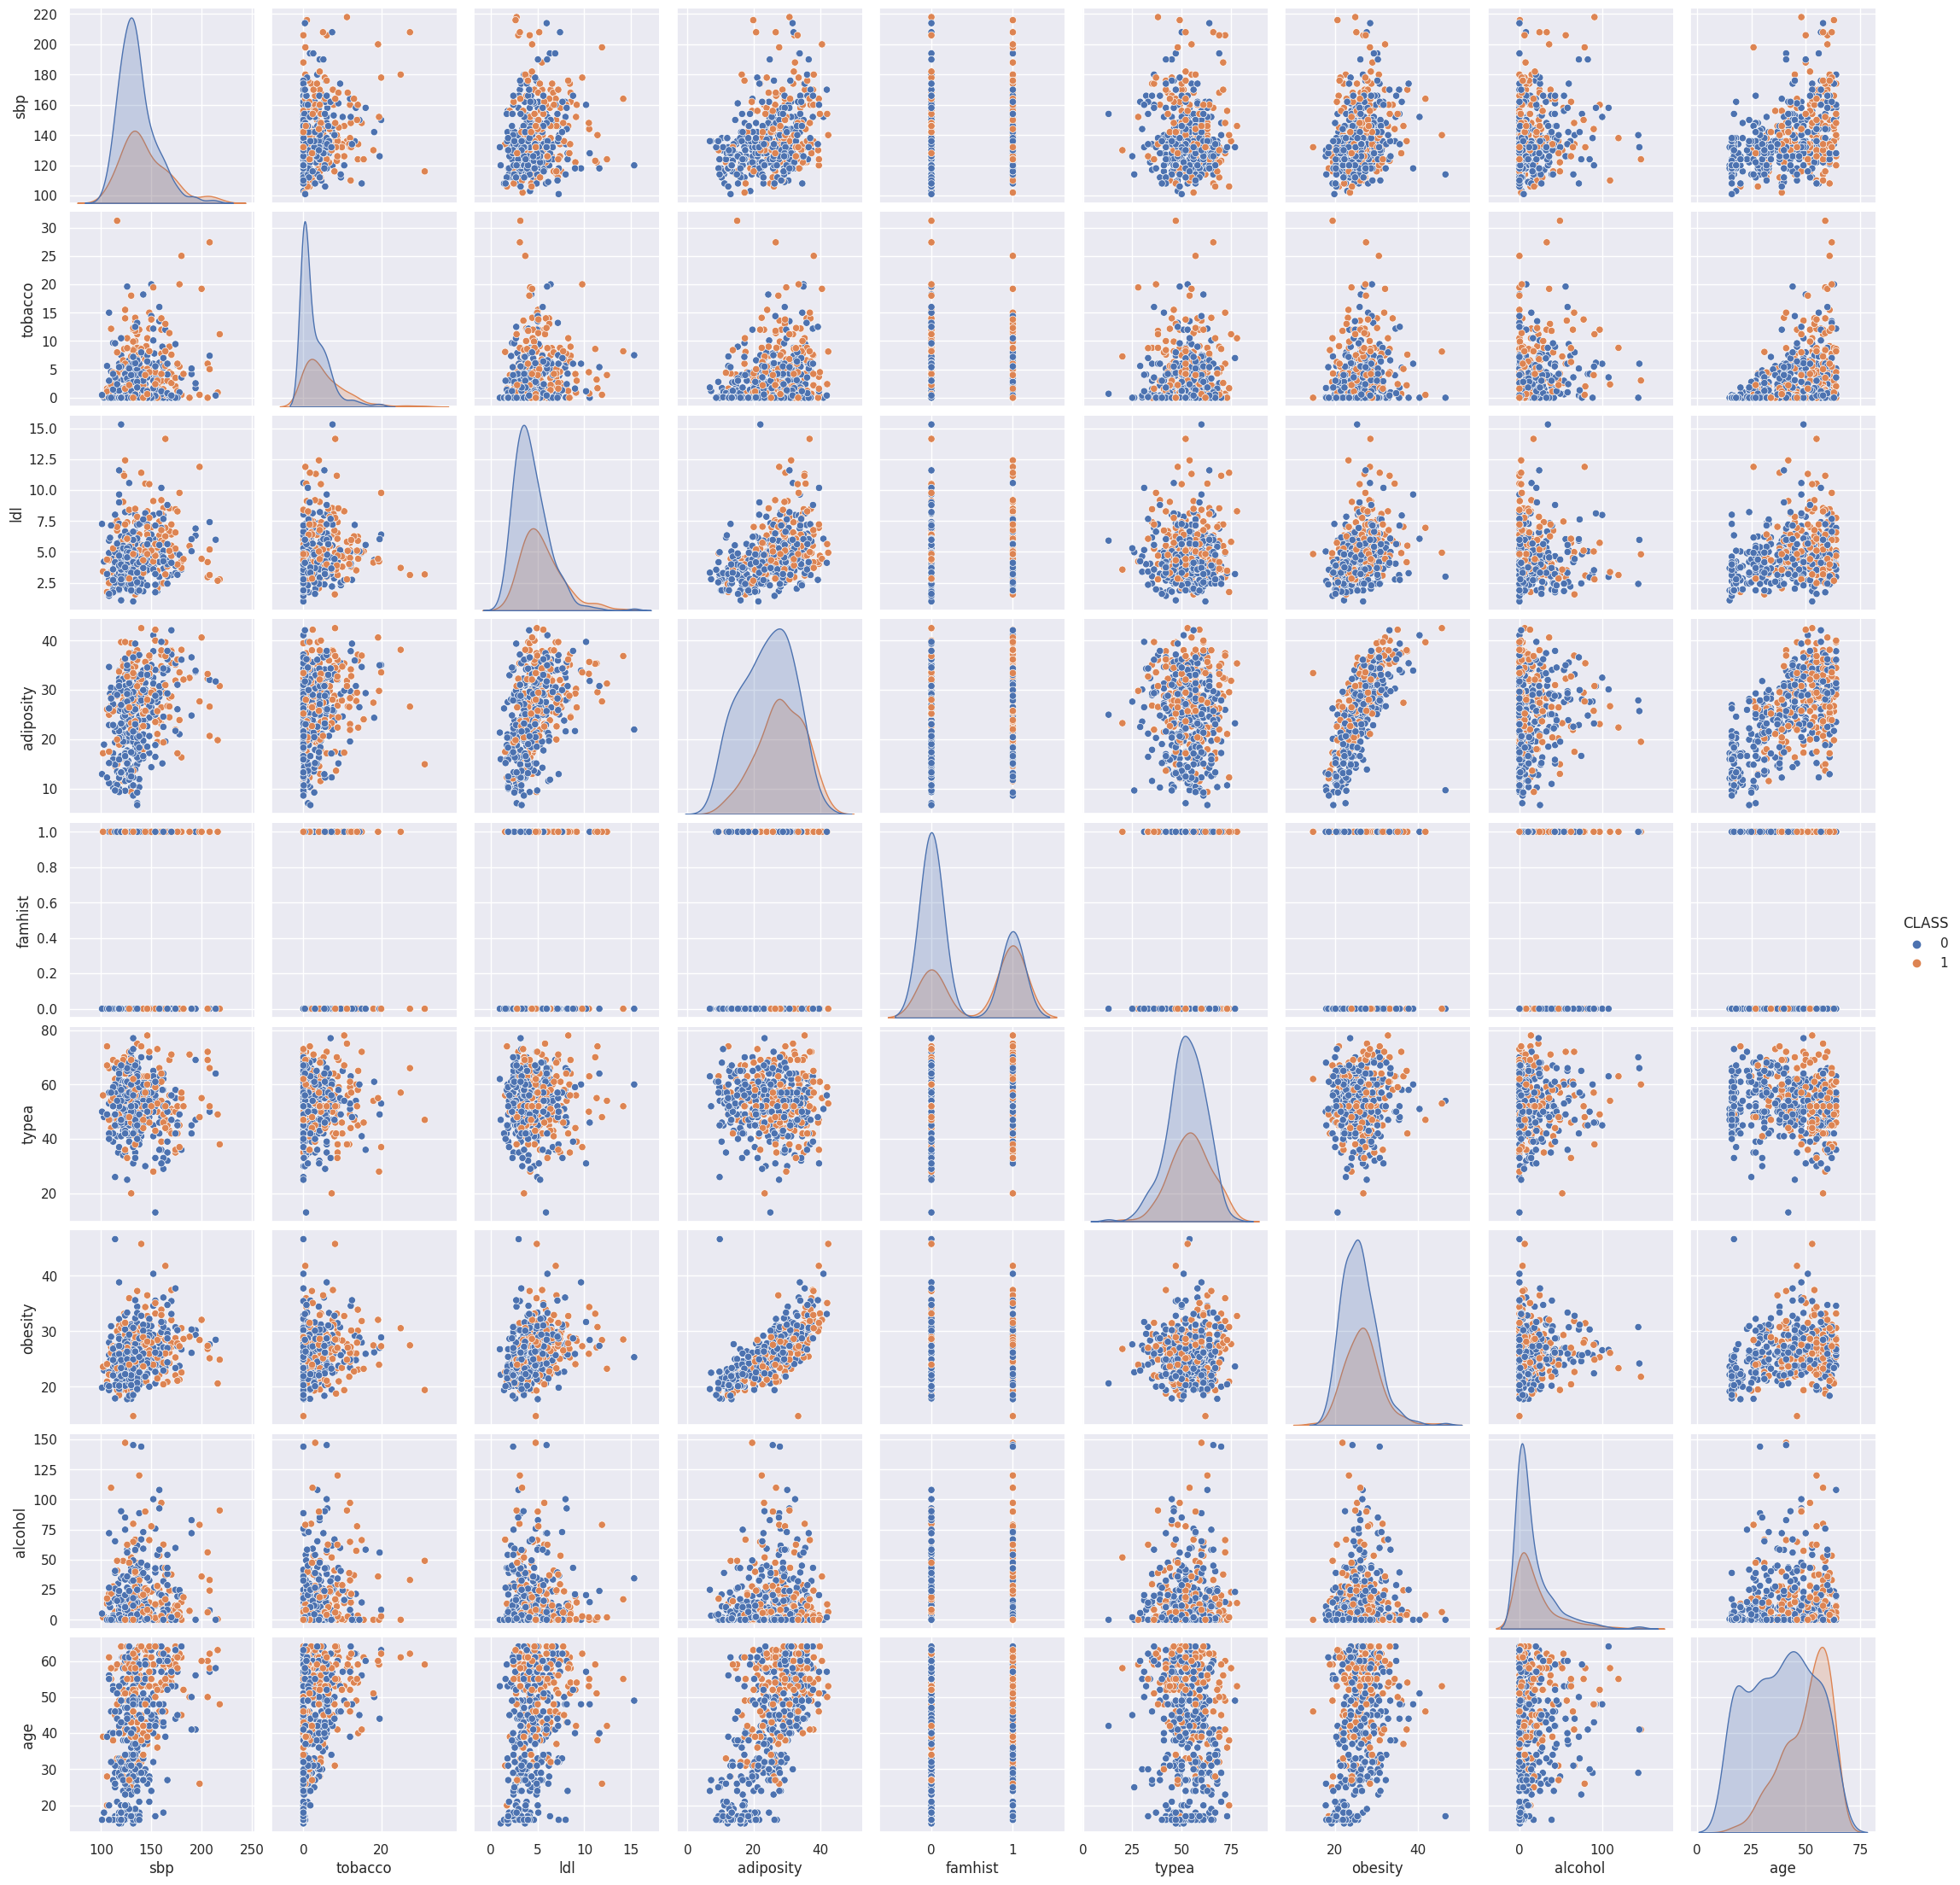

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()  # seaborn's method to set its chart style
sns.pairplot(DS, hue='CLASS', height=2.5)

                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     485.4
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           5.66e-74
Time:                        09:35:38   Log-Likelihood:                -1153.1
No. Observations:                 462   AIC:                             2310.
Df Residuals:                     460   BIC:                             2319.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1849      0.468     34.587      0.0

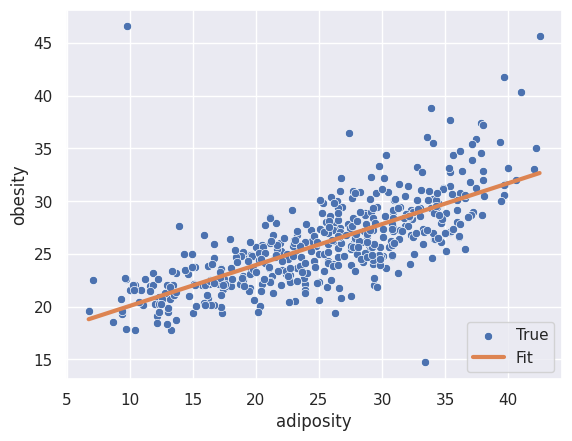

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np


mod = smf.ols(formula='obesity ~ 1 + adiposity', data=DS)
res = mod.fit()
print(res.summary())

DS['obesity_pred'] = res.predict(DS)

sns.set()
sns.scatterplot(data=DS, x='adiposity', y='obesity', color=sns.color_palette()[0] ,label='True')
sns.lineplot(data=DS, x='adiposity', y='obesity_pred', color=sns.color_palette()[1], label='Fit', linewidth=3)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     266.7
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.39e-77
Time:                        09:35:43   Log-Likelihood:                -1141.4
No. Observations:                 462   AIC:                             2289.
Df Residuals:                     459   BIC:                             2301.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      21.4298      1.167     18.365      

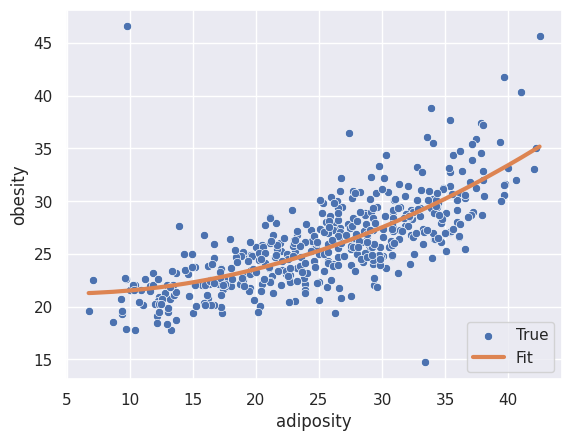

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

DS['adiposity_2']=DS['adiposity']**2
mod = smf.ols(formula='obesity ~ 1 + adiposity + adiposity_2', data=DS)
res = mod.fit()
print(res.summary())

DS['obesity_pred_2'] = res.predict(DS)


plt.figure()
sns.scatterplot(data=DS, x='adiposity', y='obesity', color=sns.color_palette()[0] ,label='True')
sns.lineplot(data=DS, x='adiposity', y='obesity_pred_2', color=sns.color_palette()[1], label='Fit', linewidth=3)
plt.show()



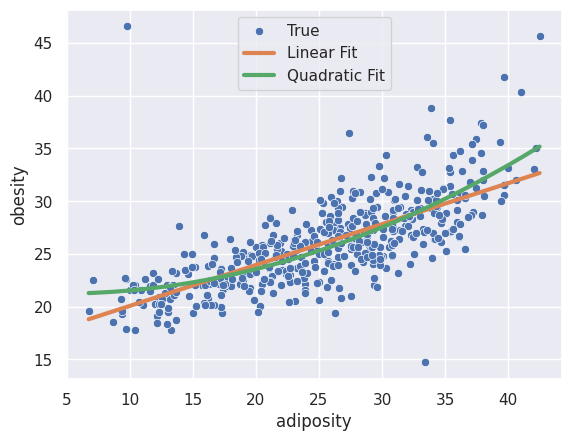

In [ ]:
plt.figure()
sns.scatterplot(data=DS, x='adiposity', y='obesity', color=sns.color_palette()[0] ,label='True')
sns.lineplot(data=DS, x='adiposity', y='obesity_pred', color=sns.color_palette()[1], label='Linear Fit', linewidth=3)
sns.lineplot(data=DS, x='adiposity', y='obesity_pred_2', color=sns.color_palette()[2], label='Quadratic Fit', linewidth=3)
plt.show()


In [ ]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import numpy as np

# DS['adiposity_2']=DS['adiposity']**2
# mod = smf.ols(formula='obesity ~ 1 + adiposity + adiposity_2 + age', data=DS)
# res = mod.fit()
# print(res.summary())

# DS['obesity_pred_2'] = res.predict(DS)


# plt.figure()
# sns.scatterplot(data=DS, x='adiposity', y='obesity', color=sns.color_palette()[0] ,label='True')
# sns.lineplot(data=DS, x='adiposity', y='obesity_pred_2', color=sns.color_palette()[1], label='Fit')
# plt.show()



In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

mod = smf.ols(formula='obesity ~ 1 + adiposity + typea', data=DS)
res = mod.fit()
print(res.summary())



# DS['obesity_pred_2'] = res.predict(DS)
# plt.figure()
# sns.scatterplot(data=DS, x='adiposity', y='obesity', color=sns.color_palette()[0] ,label='True')
# sns.lineplot(data=DS, x='adiposity', y='obesity_pred_2', color=sns.color_palette()[1], label='Fit')
# plt.show()



                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     253.1
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           8.13e-75
Time:                        09:37:58   Log-Likelihood:                -1147.8
No. Observations:                 462   AIC:                             2302.
Df Residuals:                     459   BIC:                             2314.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7267      0.884     15.521      0.0

                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     249.2
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           5.31e-74
Time:                        09:49:30   Log-Likelihood:                -1149.7
No. Observations:                 462   AIC:                             2305.
Df Residuals:                     459   BIC:                             2318.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1313      0.465     34.656      0.0

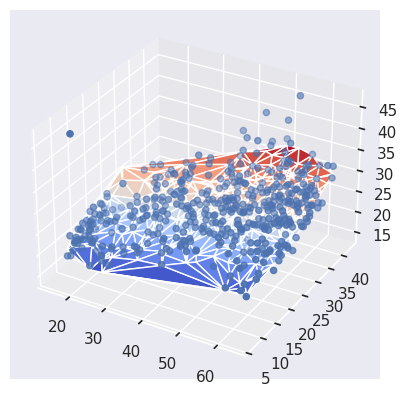

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import cm


mod = smf.ols(formula='obesity ~ 1 + adiposity + tobacco', data=DS)
res = mod.fit()
print(res.summary())

mod = smf.ols(formula='tobacco ~ 1 + obesity + age', data=DS)
res = mod.fit()
print(res.summary())

mod = smf.ols(formula='obesity ~ 1 + adiposity + age', data=DS)
res = mod.fit()
print(res.summary())

df = pd.DataFrame(columns={'adiposity','age'})
DS['obesity_pred_adip_age'] = res.predict(DS)


mod = smf.ols(formula='tobacco ~ 1 + obesity + age + tobacco', data=DS)
res = mod.fit()
print(res.summary())



import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(DS['age'],DS['adiposity'],DS['obesity'])
ax.plot_trisurf(DS['age'],DS['adiposity'],DS['obesity_pred_adip_age'],cmap=cm.coolwarm)


In [ ]:
df = pd.DataFrame(columns=['adiposity','age'])
ddf = pd.DataFrame()
for i in range(round(min(DS['adiposity'])),round(max(DS['adiposity']))):
  lst = np.arange(min(DS['age']),max(DS['age']))
  ddf['age'] = lst
  ddf['adiposity'] = i
  #display(ddf)
  df = pd.concat([df,ddf])
display(df)

# Fit Model
mod = smf.ols(formula='obesity ~ 1 + adiposity + age', data=DS)
res = mod.fit()
print(res.summary())
# Predict observations
df['obesity_pred_adip_age'] = res.predict(df)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(DS['age'],DS['adiposity'],DS['obesity'])
ax.plot_trisurf(df['age'],df['adiposity'],df['obesity_pred_adip_age'],cmap=cm.coolwarm)


,adiposity,age
0,7,15
1,7,16
2,7,17
3,7,18
4,7,19
...,...,...
44,41,59
45,41,60
46,41,61
47,41,62


                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     284.9
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.59e-81
Time:                        09:59:46   Log-Likelihood:                -1133.1
No. Observations:                 462   AIC:                             2272.
Df Residuals:                     459   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1481      0.473     36.268      0.0

AttributeError: ignored

In [ ]:
df

,adiposity,age
0,7,15
1,7,16
2,7,17
3,7,18
4,7,19
...,...,...
44,41,59
45,41,60
46,41,61
47,41,62


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

mod = smf.ols(formula='obesity ~ 1 + adiposity + adiposity*age', data=DS)
res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     189.8
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           5.78e-80
Time:                        09:39:05   Log-Likelihood:                -1132.9
No. Observations:                 462   AIC:                             2274.
Df Residuals:                     458   BIC:                             2290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.7974      1.211     14.693